### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

Data file import

In [3]:
diabetes_file = pd.read_csv('CE802_P3_Data.csv')

<h3> Visualising Data </h3>

In [4]:
diabetes_file.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,9.18,35.98,21.36,4520.91,1.25,-40.80,12.82,-2169.72,-15.03,996.53,...,-22.57,6,3885.47,Low,-7304.02,-2536.91,Rest,163.96,4.59,296.76
1,5.94,35.28,28.02,2403.84,2.46,-16.62,23.32,-4013.31,-16.17,1042.66,...,-61.05,4,9841.64,Very high,1174.24,-2541.68,Europe,-822.18,2.43,484.06
2,2.70,36.02,5.06,4452.39,-1.20,28.38,7.26,-4518.75,4.14,1223.95,...,-62.48,2,114.90,Very low,-16999.90,-2354.30,UK,-801.15,8.85,123.29
3,11.12,23.08,24.54,3280.86,0.48,60.82,44.08,-5065.47,-26.67,1482.16,...,-76.45,2,4022.62,Very low,-9313.50,-2626.67,Europe,-944.38,12.39,-8.93
4,7.78,27.62,21.70,2337.15,0.08,62.42,-39.02,-4555.65,-3.48,811.52,...,-97.78,2,-251.62,Very high,-3948.42,-2471.47,USA,-762.13,8.46,68.28
5,-4.86,36.52,23.68,4853.52,-0.09,-11.02,9.14,-4975.56,-15.60,446.92,...,-82.91,6,2062.09,Medium,-6703.34,-2175.24,Rest,-1068.89,3.90,119.74
6,12.94,47.12,18.54,3475.62,-7.44,-71.58,23.97,-3892.47,-18.51,805.73,...,-97.34,4,-3197.34,Medium,-9812.34,-1804.66,USA,-321.57,14.70,76.07
7,18.92,34.36,11.32,4168.65,1.08,87.60,-3.92,-2792.88,-20.22,893.94,...,-70.82,7,4923.96,High,-10460.30,-2170.87,UK,-534.01,25.53,255.06
8,32.50,49.42,25.76,4734.66,1.51,85.08,36.59,-4640.31,-19.47,928.37,...,-57.37,4,2066.45,Low,-10639.94,-2008.04,UK,-380.78,21.72,106.84
9,9.50,37.20,23.62,2432.37,-1.48,28.98,-57.51,-1624.17,-14.19,283.85,...,-96.56,3,3596.15,High,-7238.00,-2234.71,USA,-542.93,9.00,-8.93


In [5]:
diabetes_file.shape

(1400, 35)

In [6]:
diabetes_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1400 non-null   float64
 1   F2      1400 non-null   float64
 2   F3      1400 non-null   float64
 3   F4      1400 non-null   float64
 4   F5      1400 non-null   float64
 5   F6      1400 non-null   float64
 6   F7      1400 non-null   float64
 7   F8      1400 non-null   float64
 8   F9      1400 non-null   float64
 9   F10     1400 non-null   float64
 10  F11     1400 non-null   float64
 11  F12     1400 non-null   float64
 12  F13     1400 non-null   float64
 13  F14     1400 non-null   float64
 14  F15     1400 non-null   float64
 15  F16     1400 non-null   float64
 16  F17     1400 non-null   float64
 17  F18     1400 non-null   float64
 18  F19     1400 non-null   float64
 19  F20     1400 non-null   float64
 20  F21     1400 non-null   float64
 21  F22     1400 non-null   float64
 22  

From above information it is noted that:
1. Columns F29 and F32 are categorical values
2. The rest of the columns are  numerical

In [7]:
diabetes_file.duplicated().sum()

0

In [8]:
diabetes_file.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1400.0,10.815971,8.620017,-36.26,6.7300,10.860,14.9500,55.70
F2,1400.0,34.895929,8.638747,-5.86,30.5400,34.810,39.0900,87.86
F3,1400.0,21.734114,8.230342,-33.66,17.4550,21.720,25.5450,53.82
F4,1400.0,3409.494514,874.972405,511.23,2811.2850,3399.405,3997.1700,6366.18
F5,1400.0,-0.289907,4.304120,-36.62,-2.3100,-0.210,1.7725,18.91
F6,1400.0,46.915914,59.844389,-164.52,8.4550,47.580,86.9600,251.22
F7,1400.0,-1.454379,44.036834,-193.86,-23.6425,-1.375,19.1350,227.43
F8,1400.0,-3412.387457,881.199575,-6677.61,-4012.7250,-3402.630,-2807.2425,-772.17
F9,1400.0,-14.330593,8.822352,-43.44,-20.1600,-13.905,-8.5500,13.14
F10,1400.0,899.903400,300.542318,-69.91,695.9400,888.685,1106.7650,1855.95


In [9]:
diabetes_file.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

There are no null values present in the file 

<AxesSubplot:>

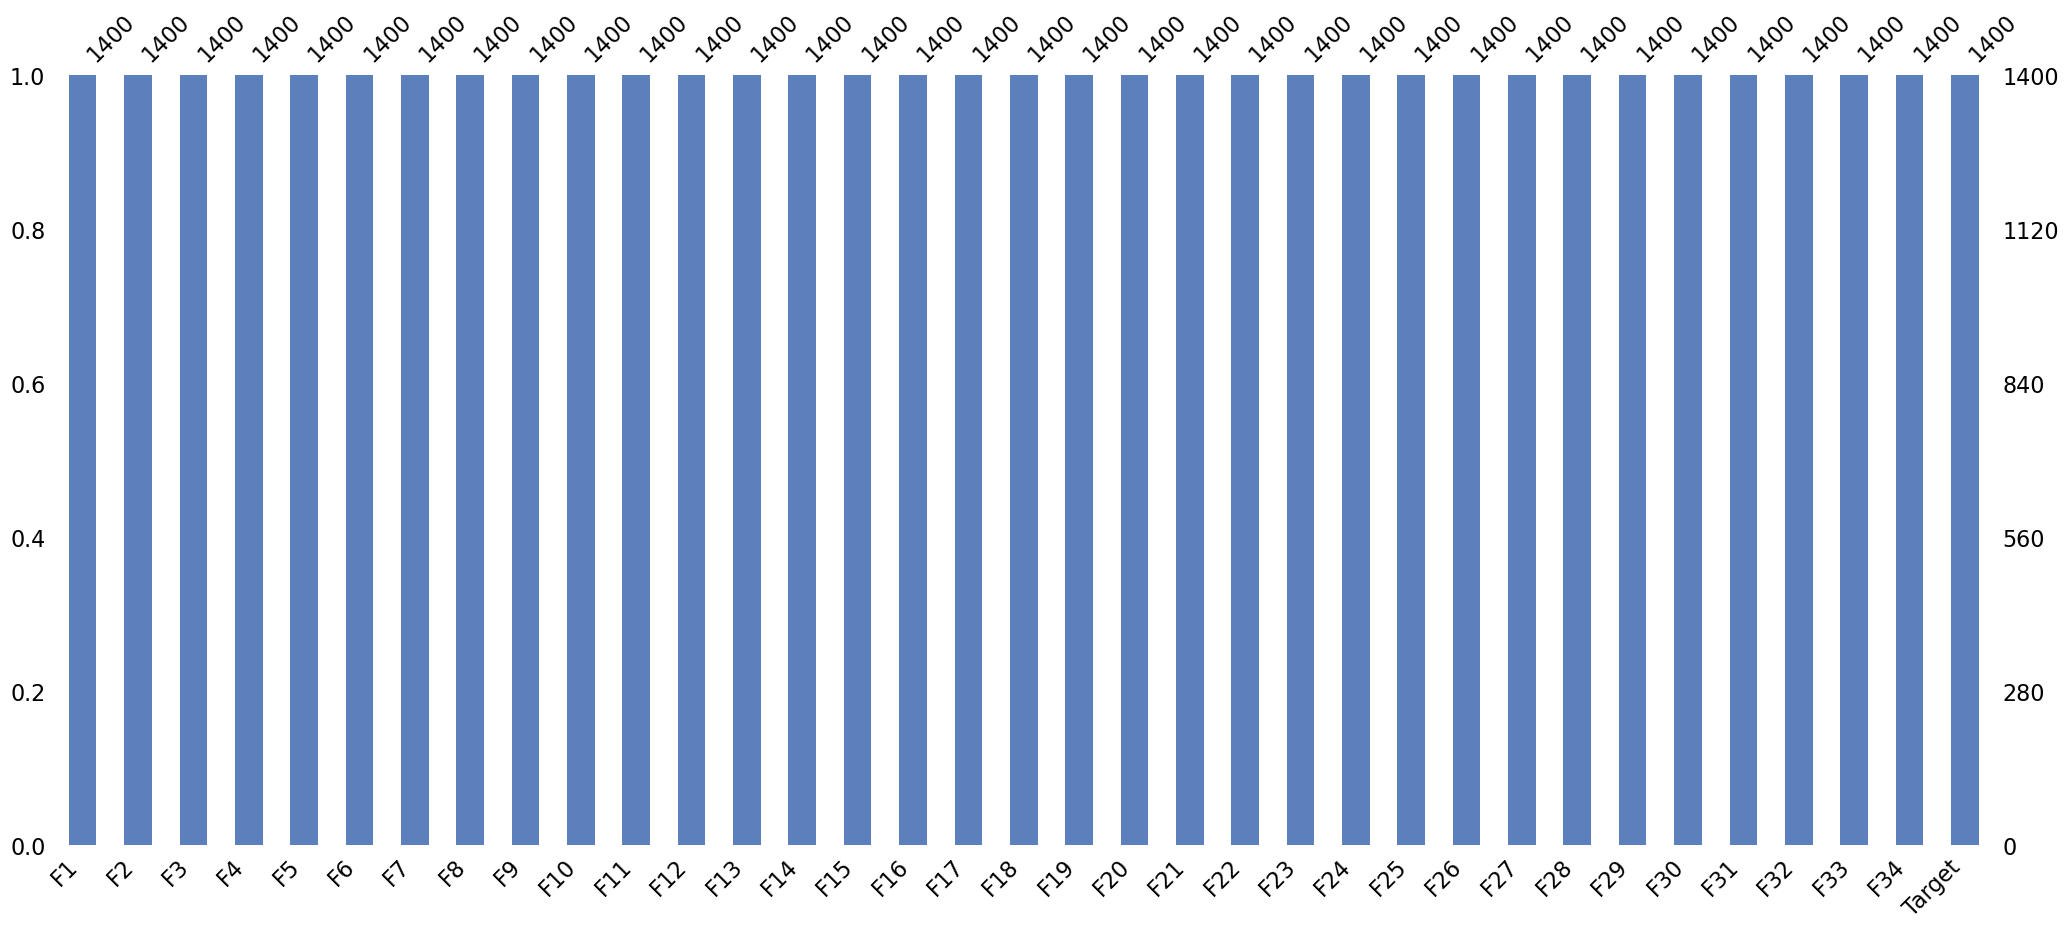

In [10]:
msno.bar(diabetes_file, color=(92/255, 128/255, 188/255))

<h3> Creating a heatmap to find the correlation between attributes. </h3>

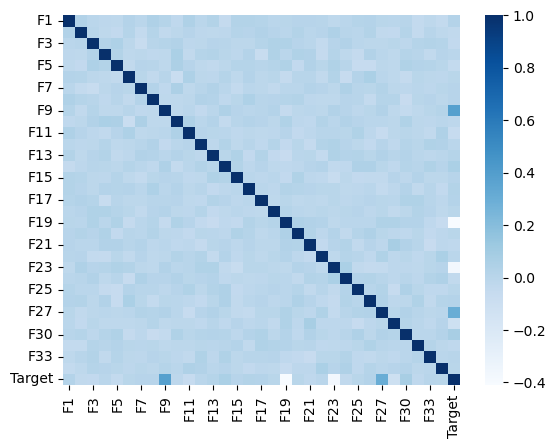

In [11]:
corr = diabetes_file.corr()
sns.heatmap(corr, annot=False, cmap="Blues")
plt.show()

<h3> Using OneHotEncoder to convert the categorical values of columns F29 and F32 into numerical data. </h3>

In [12]:
encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
encoder.fit(diabetes_file[['F29', 'F32']])

OneHotEncoder(handle_unknown='ignore', sparse=False)

<h3> Passing the encoded columns into the Diabetes File </h3>

In [13]:
encoded_data = encoder.transform(diabetes_file[['F29', 'F32']])

In [14]:
encode_diabetes_file = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['F29', 'F32']))


In [15]:
new_diabetes_file = pd.concat([diabetes_file, encode_diabetes_file], axis=1)

<h3> Checking the encoded columns </h3>

In [16]:
new_diabetes_file.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,Target,F29_High,F29_Low,F29_Medium,F29_Very high,F29_Very low,F32_Europe,F32_Rest,F32_UK,F32_USA
0,9.18,35.98,21.36,4520.91,1.25,-40.80,12.82,-2169.72,-15.03,996.53,...,296.76,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.94,35.28,28.02,2403.84,2.46,-16.62,23.32,-4013.31,-16.17,1042.66,...,484.06,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2.70,36.02,5.06,4452.39,-1.20,28.38,7.26,-4518.75,4.14,1223.95,...,123.29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,11.12,23.08,24.54,3280.86,0.48,60.82,44.08,-5065.47,-26.67,1482.16,...,-8.93,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,7.78,27.62,21.70,2337.15,0.08,62.42,-39.02,-4555.65,-3.48,811.52,...,68.28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Using ColumnTransformer as preprocessor for columns of Dataset and scaling using StandardScaler

In [17]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 
                                                                           'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 
                                                                           'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F30', 'F31', 'F33', 'F34']), 
                                                 ('cat', encoder, ['F29', 'F32'])])

<h3> Identifying the features and target variable </h3>

In [18]:
X = new_diabetes_file.drop(['Target'], axis=1)

In [19]:
Y = diabetes_file['Target']

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   F1             1400 non-null   float64
 1   F2             1400 non-null   float64
 2   F3             1400 non-null   float64
 3   F4             1400 non-null   float64
 4   F5             1400 non-null   float64
 5   F6             1400 non-null   float64
 6   F7             1400 non-null   float64
 7   F8             1400 non-null   float64
 8   F9             1400 non-null   float64
 9   F10            1400 non-null   float64
 10  F11            1400 non-null   float64
 11  F12            1400 non-null   float64
 12  F13            1400 non-null   float64
 13  F14            1400 non-null   float64
 14  F15            1400 non-null   float64
 15  F16            1400 non-null   float64
 16  F17            1400 non-null   float64
 17  F18            1400 non-null   float64
 18  F19     

<h3> Correaltion between X features </h3>

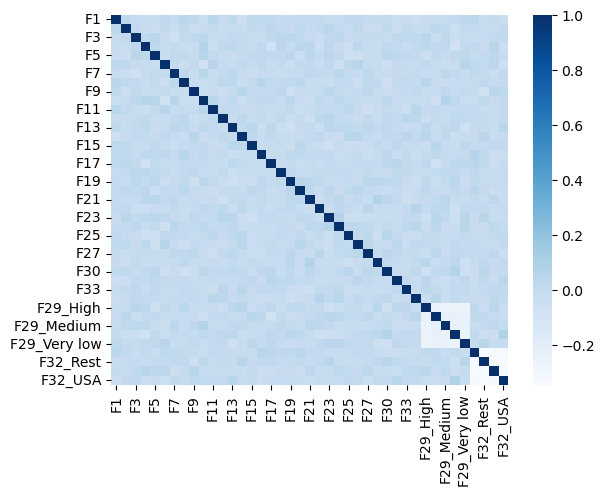

In [21]:
corr = X.corr()
sns.heatmap(corr, annot=False, cmap="Blues")
plt.show()

<h3> Dataset split into train and test </h3>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2
                                                    , random_state=42)

### Machine Learning Models used : 
* Linear Regression
* Decision Tree Regressor
* Gradient Boosting Regressor
* Random Forest Regressor

<h3> Defining KFold for cross-validation of all the models </h3>

In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=50)

<h3>  Defining a pipeline for preprocessor and model Linear Regression </h3>

In [24]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

<h3> Fit the pipeline with Train and Test set </h3>

In [25]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['F1', 'F2', 'F3', 'F4', 'F5',
                                                   'F6', 'F7', 'F8', 'F9',
                                                   'F10', 'F11', 'F12', 'F13',
                                                   'F14', 'F15', 'F16', 'F17',
                                                   'F18', 'F19', 'F20', 'F21',
                                                   'F22', 'F23', 'F24', 'F25',
                                                   'F26', 'F27', 'F28', 'F30',
                                                   'F31', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [

<h3> Training and Evaluating Model</h3>

In [26]:
lr_y_pred = lr_pipeline.predict(X_test)
score = lr_pipeline.score(X_test, y_test)
score*100

74.46520361182621

Root Median Absolute Error for Logistic Regression

In [27]:
mae_lr = median_absolute_error(y_test, lr_y_pred)
rmae_lr = np.sqrt(mae_lr)
print("RMAE:", rmae_lr)

RMAE: 7.52811397363244


Root Mean Squared Error for Logistic Regression

In [28]:
mse_lr = mean_squared_error(y_test, lr_y_pred)
rmse_lr = np.sqrt(mse_lr)
rmse_lr

98.55672435615304

In [29]:
r2_score_lr = r2_score(y_test, lr_y_pred)
r2_score_lr

0.7446520361182621

Cross Validation using kfold


In [30]:
lr_crossValScore = cross_val_score(lr_pipeline, X_train, y_train, cv=kfold, scoring='neg_median_absolute_error')
mean_rmae_lr = np.sqrt(-lr_crossValScore.mean())
print("Mean RMAE:", mean_rmae_lr)

Mean RMAE: 7.909073112571409


Taking Mean and Standard Deviation of crossval score


In [31]:
median_abs_errors_lr = abs(lr_crossValScore)
median_abs_errors_lr_mean = median_abs_errors_lr.mean()
median_abs_errors_lr_sd = median_abs_errors_lr.std()
print("Median Absolute Error Scores:", median_abs_errors_lr)
print("Mean MAE:", median_abs_errors_lr_mean)
print("Standard Deviation:", median_abs_errors_lr_sd)

Median Absolute Error Scores: [69.9796875 61.52375   52.791875  62.6240625 65.8478125]
Mean MAE: 62.553437499999994
Standard Deviation: 5.69834085296436


<h3>  Defining a pipeline for preprocessor and model Decision Tree Regressor </h3>

In [32]:
DT_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(max_depth=5))])

<h3> Fit the pipeline with Train and Test set </h3>

In [33]:
DT_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['F1', 'F2', 'F3', 'F4', 'F5',
                                                   'F6', 'F7', 'F8', 'F9',
                                                   'F10', 'F11', 'F12', 'F13',
                                                   'F14', 'F15', 'F16', 'F17',
                                                   'F18', 'F19', 'F20', 'F21',
                                                   'F22', 'F23', 'F24', 'F25',
                                                   'F26', 'F27', 'F28', 'F30',
                                                   'F31', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [

<h3> Training and Evaluating the Model</h3>

In [34]:
dt_y_pred = DT_pipeline.predict(X_test)
DT_score = DT_pipeline.score(X_test, y_test)
DT_score*100

43.74649189969739

Sqaured Median Absolute Error Decision Tree

In [35]:
mae_DT = median_absolute_error(y_test, dt_y_pred)
rmae_DT = np.sqrt(mae_DT)
print("RMAE:", rmae_DT)

RMAE: 9.339116511866752


Mean Sqaured Error Decision Tree

In [36]:
mse_DT = mean_squared_error(y_test, dt_y_pred)
rmse_DT = np.sqrt(mse_DT)
print(rmse_DT)

146.28333968296957


In [37]:
r2_score_DT = r2_score(y_test, dt_y_pred)
r2_score_DT

0.43746491899697393

Cross Validation with kfold 

In [38]:
dt_crossValScore = cross_val_score(DT_pipeline, X_train, y_train, cv=kfold, scoring='neg_median_absolute_error')

mean_rmae_dt = np.sqrt(-1 * (dt_crossValScore.mean()))
print("Mean RMAE:", mean_rmae_dt)

Mean RMAE: 8.62307184229815


Mean and Standard Deviation for obtained cross val score

In [39]:
median_abs_errors_dt = abs(dt_crossValScore)
median_abs_errors_dt_mean = median_abs_errors_dt.mean()
median_abs_errors_dt_sd = median_abs_errors_dt.std()
print("Median Absolute Error Scores:", median_abs_errors_dt)
print("Mean MAE:", median_abs_errors_dt_mean)
print("Standard Deviation:", median_abs_errors_dt_sd)

Median Absolute Error Scores: [75.57416667 78.04069565 76.72035437 81.69725    59.75437329]
Mean MAE: 74.35736799743523
Standard Deviation: 7.586204958346627


<h3>  Defining a pipeline for preprocessor and model Gradient Boosting Regressor </h3>

In [40]:
GB_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(random_state=50))])

<h3> Fit the pipeline with Train and Test set </h3>

In [41]:
GB_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['F1', 'F2', 'F3', 'F4', 'F5',
                                                   'F6', 'F7', 'F8', 'F9',
                                                   'F10', 'F11', 'F12', 'F13',
                                                   'F14', 'F15', 'F16', 'F17',
                                                   'F18', 'F19', 'F20', 'F21',
                                                   'F22', 'F23', 'F24', 'F25',
                                                   'F26', 'F27', 'F28', 'F30',
                                                   'F31', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [

<h3> Training and Evaluating the Model</h3>

In [42]:
GB_y_pred = GB_pipeline.predict(X_test)
GB_score = GB_pipeline.score(X_test, y_test)
GB_score*100

84.27862580027178

Median Absolute Error for Gradient Boosting Regressor Model

In [43]:
mae_GB = median_absolute_error(y_test, GB_y_pred)
rmae_GB = np.sqrt(mae_GB)
print("RMAE:", rmae_GB)

RMAE: 6.825886280589089


Root Mean Squared Error 

In [44]:
mse_GB = mean_squared_error(y_test, GB_y_pred)
rmse_GB = np.sqrt(mse_GB)
rmse_GB

77.33308109773573

In [45]:
r2_score_GB = r2_score(y_test, GB_y_pred)
r2_score_GB

0.8427862580027178

Cross Validation using kfold 

In [46]:
gb_crossValScore = cross_val_score(GB_pipeline, X_train, y_train, cv=kfold, scoring='neg_median_absolute_error')

mean_rmae_gb = np.sqrt(-gb_crossValScore.mean())
print("Mean RMAE:", mean_rmae_gb)

Mean RMAE: 7.341199651381233


Mean and Standard Deviation for obtained CrossVal score

In [47]:
median_abs_errors_gb = abs(gb_crossValScore)
median_abs_errors_gb_mean = median_abs_errors_gb.mean()
median_abs_errors_gb_sd = median_abs_errors_gb.std()
print("Median Absolute Error Scores:", median_abs_errors_gb)
print("Mean MAE:", median_abs_errors_gb_mean)
print("Standard Deviation:", median_abs_errors_gb_sd)

Median Absolute Error Scores: [54.45283219 49.78615307 54.63645094 59.30531709 51.28530832]
Mean MAE: 53.89321232143993
Standard Deviation: 3.281022859501609


<h3>  Defining a pipeline for preprocessor and model Random Forest Regressor </h3>

In [48]:
RF_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

<h3> Fit the pipeline with Train and Test set </h3>

In [49]:
RF_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['F1', 'F2', 'F3', 'F4', 'F5',
                                                   'F6', 'F7', 'F8', 'F9',
                                                   'F10', 'F11', 'F12', 'F13',
                                                   'F14', 'F15', 'F16', 'F17',
                                                   'F18', 'F19', 'F20', 'F21',
                                                   'F22', 'F23', 'F24', 'F25',
                                                   'F26', 'F27', 'F28', 'F30',
                                                   'F31', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [

<h3> Training and Evaluating Model</h3>

In [50]:
RF_y_pred = RF_pipeline.predict(X_test)
RF_score = RF_pipeline.score(X_test, y_test)
RF_score*100

71.66947555907363

Median Absolute Error 

In [51]:
mae_RF = median_absolute_error(y_test, RF_y_pred)
rmae_RF = np.sqrt(mae_RF)
print("RMAE:", rmae_RF)

RMAE: 8.377735374192717


Root Mean Squared Error 

In [52]:
mse_RF = mean_squared_error(y_test, RF_y_pred)
rmse_RF = np.sqrt(mse_RF)
rmse_RF

103.81195462075681

In [53]:
r2_score_RF = r2_score(y_test, RF_y_pred)
r2_score_RF

0.7166947555907364

Cross Validation using KFold

In [54]:
RF_crossValScore = cross_val_score(RF_pipeline, X_train, y_train, cv=kfold, scoring='neg_median_absolute_error')

mean_rmae_RF = np.sqrt(-RF_crossValScore.mean())
print("Mean RMAE:", mean_rmae_RF)

Mean RMAE: 8.397449612828883


Mean and Standard Deviation for obtained CrossVal score

In [55]:
median_abs_errors_RF = abs(RF_crossValScore)
median_abs_errors_RF_mean = median_abs_errors_RF.mean()
median_abs_errors_RF_sd = median_abs_errors_RF.std()
print("Median Absolute Error Scores:", median_abs_errors_RF)
print("Mean MAE:", median_abs_errors_RF_mean)
print("Standard Deviation:", median_abs_errors_RF_sd)

Median Absolute Error Scores: [77.00725 62.58625 75.92045 73.2592  63.81265]
Mean MAE: 70.51715999999996
Standard Deviation: 6.110407223123533


<h3> Plotting a bar graph for Root Median Absolute Error of all the models </h3>

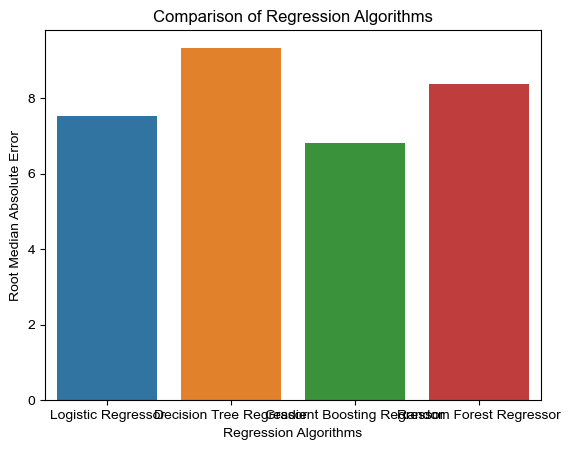

In [56]:
algorithms = ['Logistic Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'Random Forest Regressor']
mae_scores = [rmae_lr, rmae_DT, rmae_GB, rmae_RF]

# Create a barplot
sns.barplot(x=algorithms, y=mae_scores)

# Set the size of the figure
sns.set(rc={'figure.figsize':(10,9)})
plt.title('Comparison of Regression Algorithms')

# Set the labels for the x-axis and y-axis
plt.xlabel('Regression Algorithms')
plt.ylabel('Root Median Absolute Error')

# Show the plot
plt.show()

<h3> Bar Plot of Root Mean Squared Error of models

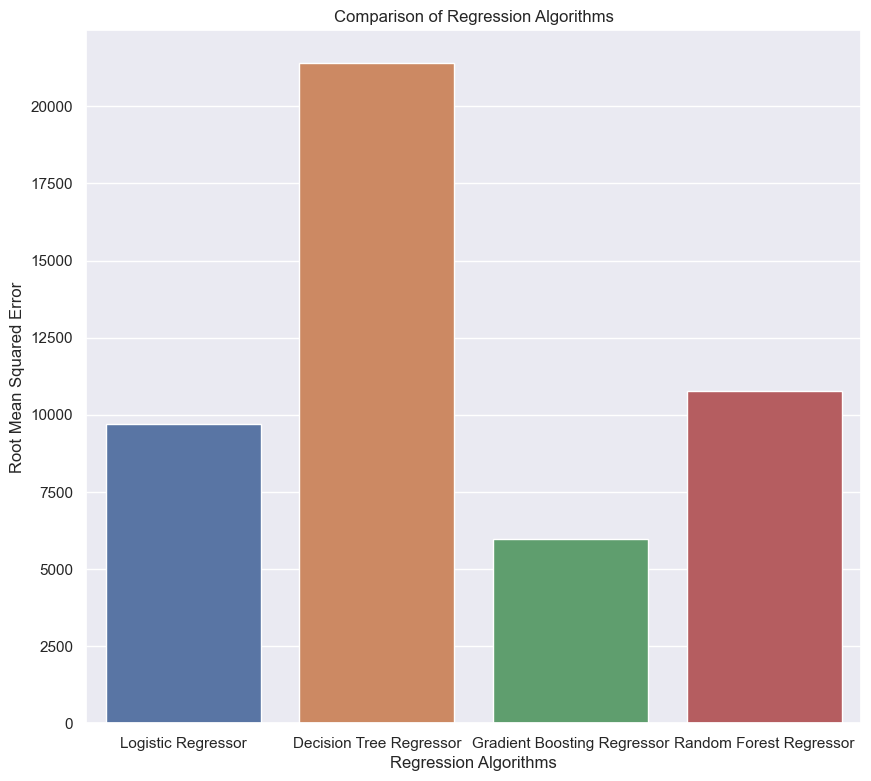

In [57]:
algorithms = ['Logistic Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'Random Forest Regressor']
mse_scores = [mse_lr, mse_DT, mse_GB, mse_RF]

# Create a barplot
sns.barplot(x=algorithms, y=mse_scores)

# Set the size of the figure
sns.set(rc={'figure.figsize':(10,8.5)})
plt.title('Comparison of Regression Algorithms')

# Set the labels for the x-axis and y-axis
plt.xlabel('Regression Algorithms')
plt.ylabel('Root Mean Squared Error')

# Show the plot
plt.show()

<h3> Bar Plot of R2 Scores of all models

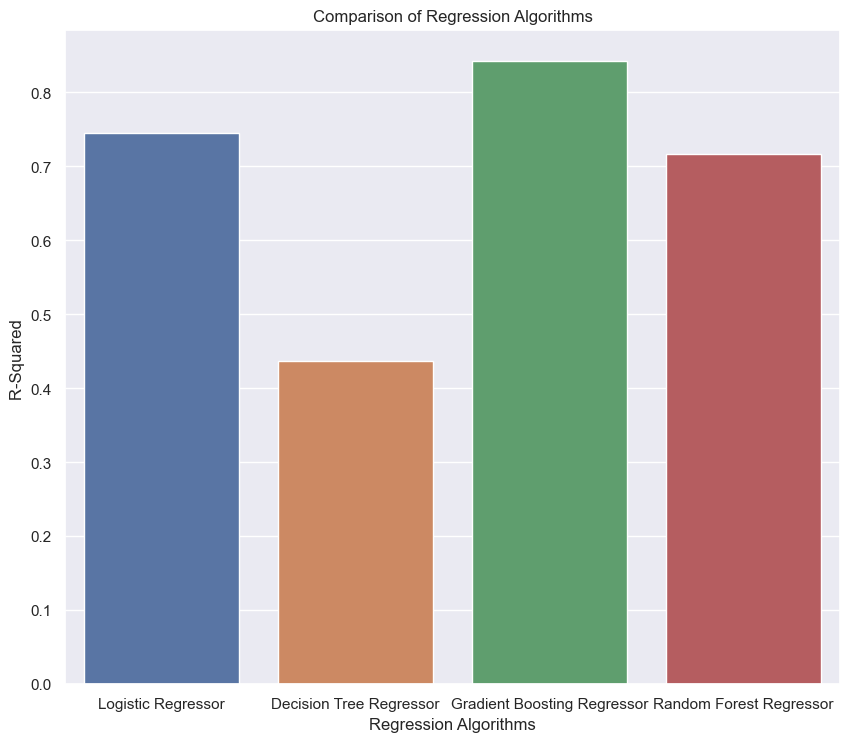

In [58]:
algorithms = ['Logistic Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'Random Forest Regressor']
r2_scores = [r2_score_lr, r2_score_DT, r2_score_GB, r2_score_RF]

# Create a barplot
sns.barplot(x=algorithms, y=r2_scores)

# Set the size of the figure
sns.set(rc={'figure.figsize':(10,8.5)})
plt.title('Comparison of Regression Algorithms')

# Set the labels for the x-axis and y-axis
plt.xlabel('Regression Algorithms')
plt.ylabel('R-Squared ')

# Show the plot
plt.show()

<h3> Defining all models together to select the best model with lowest Median Absolute Error score </h3>

In [59]:
ml_models = [('Linear Regression', LinearRegression()),
             ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=5)),
             ('Gradient Boosting', GradientBoostingRegressor(random_state=50)),
             ('Random Forest Regressor', RandomForestRegressor())]

In [60]:
best_ml_model = np.argmin(mse_scores)
model_Selection = ml_models[best_ml_model][1]
print(f'Best ML Model: {ml_models[best_ml_model][0]}')


Best ML Model: Gradient Boosting


<h3> Fitting the best model acquired in a pipeline </h3>

In [61]:
bestModel_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_Selection)])
bestModel_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['F1', 'F2', 'F3', 'F4', 'F5',
                                                   'F6', 'F7', 'F8', 'F9',
                                                   'F10', 'F11', 'F12', 'F13',
                                                   'F14', 'F15', 'F16', 'F17',
                                                   'F18', 'F19', 'F20', 'F21',
                                                   'F22', 'F23', 'F24', 'F25',
                                                   'F26', 'F27', 'F28', 'F30',
                                                   'F31', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [

In [62]:
mse_best_model = mean_squared_error(y_test, bestModel_pipeline.predict(X_test))
root_mse = np.sqrt(mse_best_model)
root_mse

77.33308109773573

### Part B

In [63]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

predicted = bestModel_pipeline.predict(test_data)
# CHANGE HERE -- use your previously trained predictor and apply it to test_data
# (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])